In [1]:
import numpy as np
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

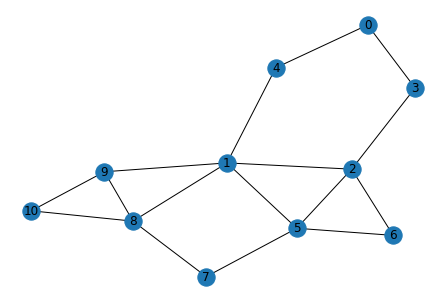

In [2]:
#There are mutual advances between the nodes attached to each other.
edges= [(0,4),(0,3),(1,2),
       (1,4),(1,8),(1,9),
       (2,3),(2,6),(1,5),
       (2,5),(5,6),(7,8),
       (7,5),(8,9),(8,10),
       (9,10)]
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G,with_labels=True)
plt.show()

In [3]:
#Simply reward and Q table
reward_table=[
    [-1,-1,-1,0,0,-1,-1,-1,-1,-1,-1],
    [-1,-1,0,-1,0,0,-1,-1,0,0,-1],
    [-1,0,-1,0,-1,0,0,-1,-1,-1,-1],
    [0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1],
    [0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1],
    [-1,0,0,-1,-1,-1,0,0,-1,-1,-1],
    [-1,-1,0,-1,-1,0,-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1,0,-1,-1,0,-1,-1],
    [-1,0,-1,-1,-1,-1,-1,0,-1,0,100],
    [-1,0,-1,-1,-1,-1,-1,-1,0,-1,100],
    [-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1]]

q_table = np.zeros_like(reward_table)

#paramaters
gamma = 0.8
learning_rate = 0.7
iteration = 1000

#Target node
goal = 10

#Initial condition
state=-1
action=-1

In [4]:
#Algorithm
for i in range(iteration):
    if state ==-1:
        state=round(random.uniform(0,len(reward_table)-2))
    
    action = round(random.uniform(0,len(reward_table[state])-1))
    
    while reward_table[state][action] == -1:
        action = round(random.uniform(0,len(reward_table[state])-1))
    
    q_table[state][action] = ((1-learning_rate)*q_table[state][action] + 
                              learning_rate*(reward_table[state][action] + gamma*np.max(q_table[action,:])))
    
    if action != goal:
        state=action
    else:
        state = -1

In [5]:
q_table=pd.DataFrame(q_table)
q_table

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,37,48,0,0,0,0,0,0
1,0,0,48,0,48,48,0,0,78,78,0
2,0,61,0,37,0,48,37,0,0,0,0
3,37,0,48,0,0,0,0,0,0,0,0
4,37,61,0,0,0,0,0,0,0,0,0
5,0,61,48,0,0,0,37,61,0,0,0
6,0,0,48,0,0,48,0,0,0,0,0
7,0,0,0,0,0,48,0,0,78,0,0
8,0,61,0,0,0,0,0,61,0,78,99
9,0,61,0,0,0,0,0,0,78,0,99


In [6]:
#Finding the shortest way from the table
x=0
ind=0
k=[0]
while x!=10:
    ind = q_table.loc[x][q_table.loc[x]==q_table.loc[x].max()].index
    if len(ind)==1:
        x=ind[0]
        k.append(x)
    else:
        k.append("/".join(str(e) for e in ind))
        x = ind.max()

In [7]:
#The shortest path to choose
print(" -> ".join([str(d) for d in k]))

0 -> 4 -> 1 -> 8/9 -> 10
